# Import Libraries and Data

In [1]:
#Import relevant libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import classification-relevant data (employee dataset) 

df = pd.read_csv('Employee.csv')
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


# Explore Data

In [3]:
#statistical measure for numerical values
df.describe() 

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


array([[<AxesSubplot:title={'center':'JoiningYear'}>,
        <AxesSubplot:title={'center':'PaymentTier'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'ExperienceInCurrentDomain'}>],
       [<AxesSubplot:title={'center':'LeaveOrNot'}>, <AxesSubplot:>]],
      dtype=object)

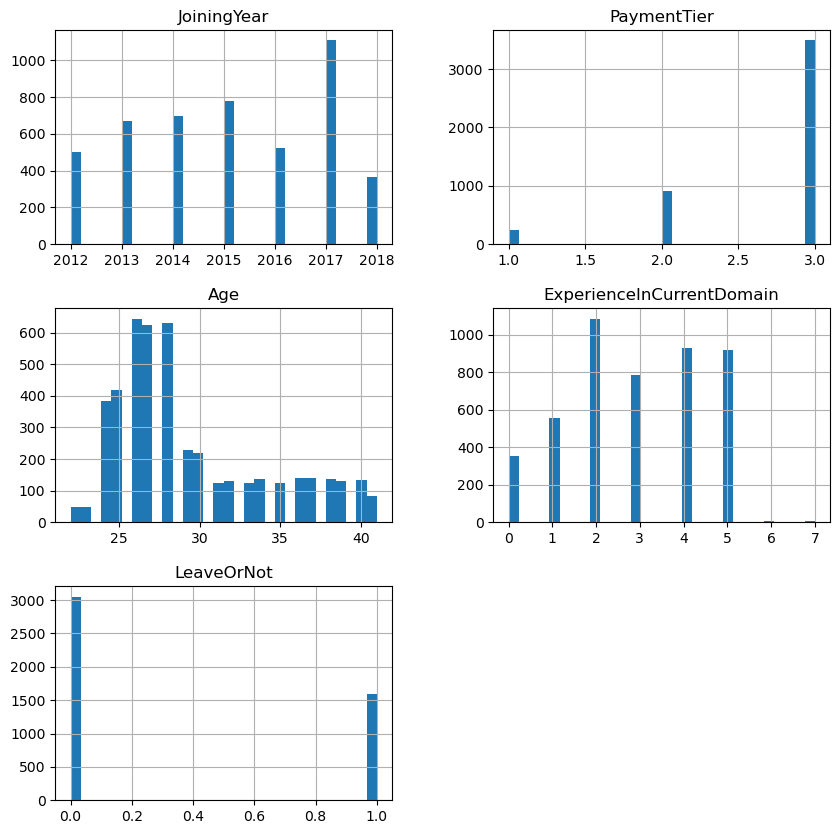

In [4]:
#Histogram overview of the data for all 9 columns
df.hist(bins=30, figsize=(10, 10))

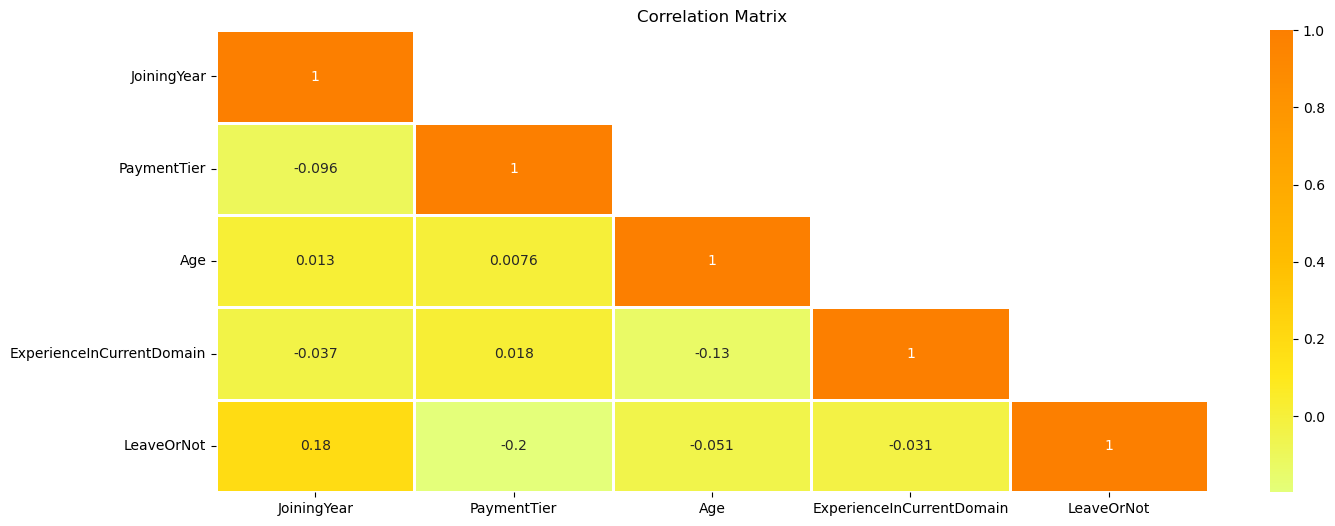

In [5]:
#we can see that there is very low correlation between the dimensions
# applicability of LogReg fullfilled
plt.figure(figsize=(16,6))
mask = np.triu(df.corr(),k=1)
sns.heatmap(df.corr(), annot=True, linewidths=1, mask=mask, cmap='Wistia')

plt.title('Correlation Matrix')
plt.show()

# Data Transformation

In [6]:
# Label Encoding to convert categorical variables into numerical variables
# A MultiColumnLabelEncoder is defined to perform Label Encoding over multiple columns instead of one.
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() #Initalization as shortcut 'le'

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = le.fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = le.fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)


In [7]:
# Label Encode multiple columns
#categorical from above
df = MultiColumnLabelEncoder(columns = ['Education', 'City', 'Gender', 
                                        'EverBenched']).fit_transform(df)

# Show the first five columns 
df.head(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1


In [8]:
# X Set without label
# y Set with label
X= df.drop(['LeaveOrNot'], axis=1)
y = df['LeaveOrNot']

In [9]:
y

0       0
1       1
2       0
3       1
4       1
       ..
4648    0
4649    1
4650    1
4651    0
4652    0
Name: LeaveOrNot, Length: 4653, dtype: int64

In [10]:
# no need of scaling in this case, label encoding is sufficient
X

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,0,2017,0,3,34,1,0,0
1,0,2013,2,1,28,0,0,3
2,0,2014,1,3,38,0,0,2
3,1,2016,0,3,27,1,0,5
4,1,2017,2,3,24,1,1,2
...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,0,0,4
4649,1,2013,2,2,37,1,0,2
4650,1,2018,1,3,27,1,0,5
4651,0,2012,0,3,30,1,1,2


# Training & Testing with Split Validation

In [11]:
#Split-Validation with x_scaled as X

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, 
                                                    random_state = 42)

In [12]:
#Check shape
X_train.shape, X_test.shape

((3117, 8), (1536, 8))

In [13]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate the model with default settings
logreg = LogisticRegression(solver='liblinear', random_state=42)

# fit the model on training set X
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [14]:
#Prediction on test set
y_pred_test = logreg.predict(X_test)
y_pred_test

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [15]:
#Prediction probabilites for the target variable 0 (LeaveOrNot=Not Leave)
logreg.predict_proba(X_test)[:,0]

array([0.65875595, 0.6914106 , 0.49838897, ..., 0.48758699, 0.83599601,
       0.72406604])

In [16]:
#Prediction probabilites for the target variable 1 (LeaveOrNot=Leave)
logreg.predict_proba(X_test)[:,1]

array([0.34124405, 0.3085894 , 0.50161103, ..., 0.51241301, 0.16400399,
       0.27593396])

In [17]:
#Model Accuracy of the test set
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred_test))

0.7154947916666666


In [18]:
#Compare train and test set accuracy

y_pred_train = logreg.predict(X_train)
y_pred_train

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, 
                                                                     y_pred_train)))

Training-set accuracy score: 0.7113


# Overfitting check

In [19]:
#Rerun
# no sign for overfitting due to the reason both accuracy values are similiar
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.7113
Test set score: 0.7155


# Evalaute LogReg with fixed parameters

In [20]:
# fit the model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=42)

# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=42, solver='liblinear')

In [21]:
#no significant differences for fixed LogReg model
print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.7106
Test set score: 0.7155


In [22]:
# fit the model with C=0.01

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=42)

# fit the model
logreg001.fit(X_train, y_train)

print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.7116
Test set score: 0.7103


<AxesSubplot:>

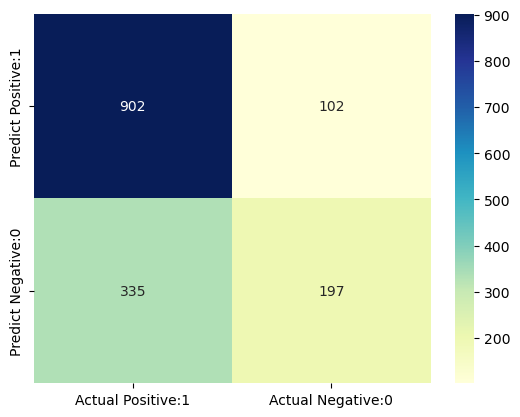

In [23]:
#Confusion Matrix of LogReg with default setting (last execution of pred_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [24]:
#Classification metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.73      0.90      0.80      1004
           1       0.66      0.37      0.47       532

    accuracy                           0.72      1536
   macro avg       0.69      0.63      0.64      1536
weighted avg       0.70      0.72      0.69      1536



In [25]:
#Alternative formalised calculation of Accuracy as an example

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7155


In [26]:
#Alternative formalised calculation of Precision as an example
precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8984


# ROC and AUC curve 

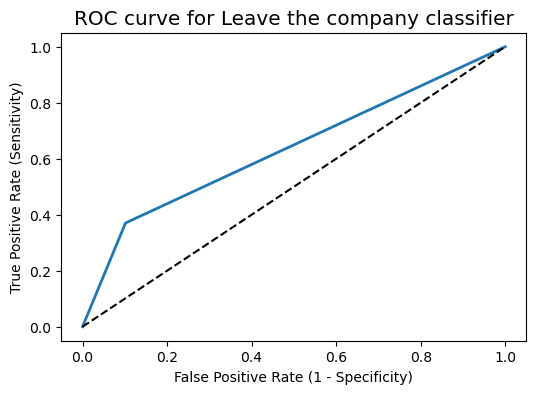

In [27]:
# visual classification model performance
# plot ROC Curve

from sklearn.metrics import roc_curve

# positive label is to leave the company which is represented by 1
# the actucal label y_test is considered in addition to the predicted one y_pred_test

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test, pos_label = 1)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Leave the company classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [28]:
#Compute ROC-value
#A perfect classifier will have a ROC  equal to 1,  a purely  classifier will have a ROC to 0.5.
# we derive a medium result with 0.62

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_test)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.6344


In [29]:
# calculate cross-validated ROC with k=10
# we see that the ROC significantly increases

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(logreg, X, y, cv=10, 
                                          scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.6797


# Training & Testing with Cross Validation

In [30]:
# Apply 10-fold Cross Validation
# no significant increase in accuracy despite cv
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X, y, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))
print('------')
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.72103004 0.66523605 0.71459227 0.71827957 0.71182796 0.70752688
 0.71182796 0.70322581 0.70752688 0.71612903]
------
Average cross-validation score: 0.7077


In [31]:
# we will now test if there is an optimisation potential of parameters
# C = regularisation parameter
from sklearn.model_selection import GridSearchCV

parameters = [{'C':[1, 10, 100, 1000]}]

grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             param_grid=[{'C': [1, 10, 100, 1000]}], scoring='accuracy')

In [32]:
# which parameters performend best? 
# best score achieved during the GridSearchCV

print(grid_search.best_score_)

# print parameters that give the best results
print(grid_search.best_params_)

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.
                                                               best_estimator_))

0.7099678456591639
{'C': 10}


Estimator that was chosen by the search : 

 LogisticRegression(C=10, random_state=42, solver='liblinear')


# Evaluate LogReg with PCA Dimensionality Reduction

In [33]:
#Alternative with PCA, but here no need --> we have no curse of dimensionality here 

from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.75932692, 0.11315284, 0.0760845 , 0.02447766, 0.00941755,
       0.00835084, 0.00641703, 0.00277265])

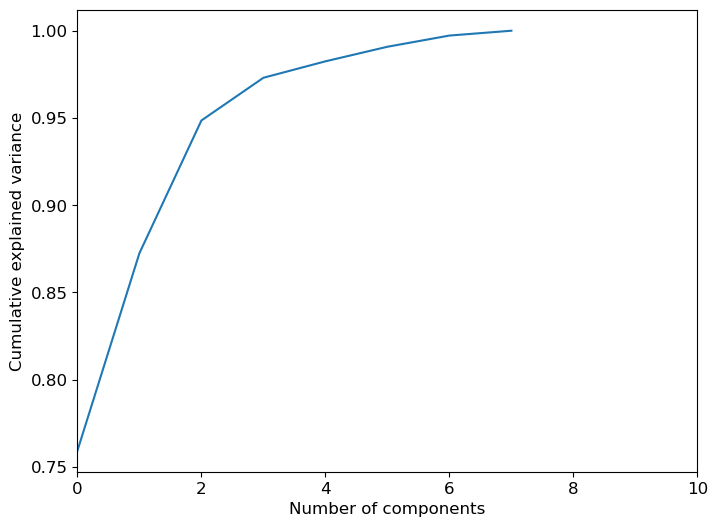

In [34]:
#Plot explained variance ratio with number of dimensions 

plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,10,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()